# Task-03
# Decision Tree Classifier Algorithem Implementation

In [1]:
import pandas as pd
import numpy as np

# Read dataset and describe it

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Analysis Section

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label Encoding

In [26]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
spe_map={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Species']=df['Species'].map(spe_map)

# pairplot 

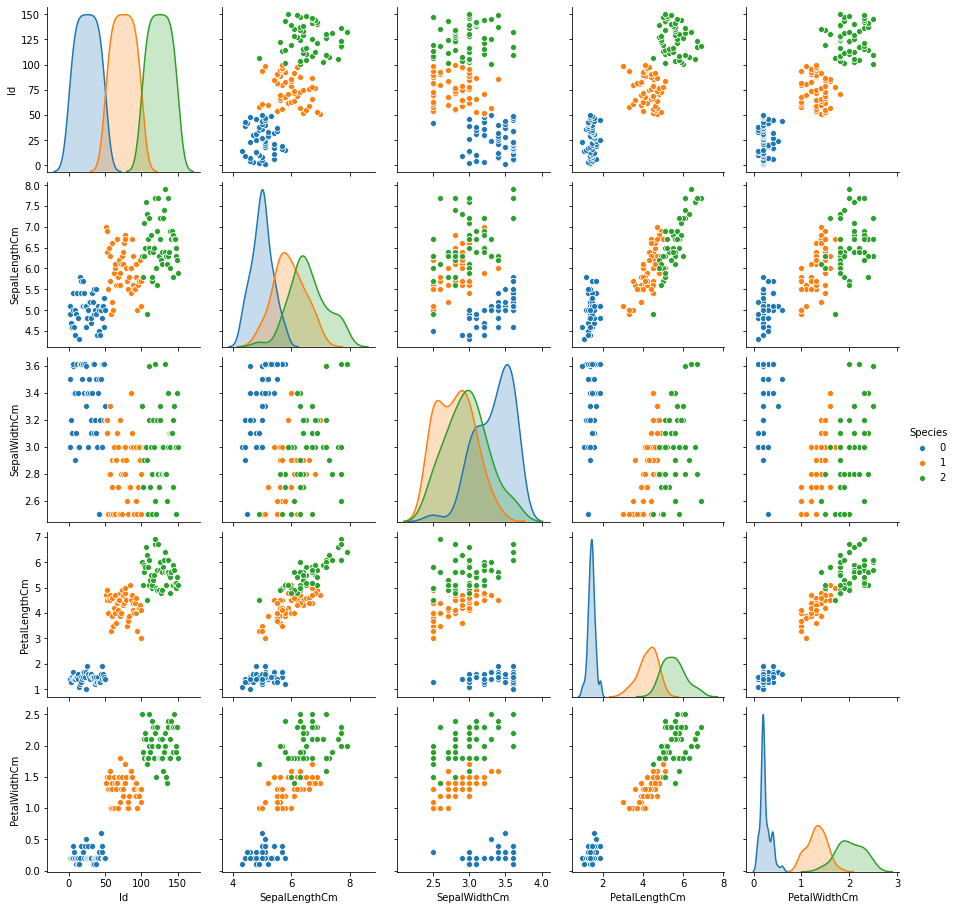

In [28]:
sns.pairplot(data=df,hue='Species',diag_kind='kde')

# Correlation Martix

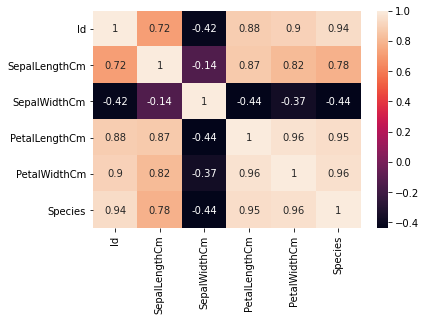

In [29]:
sns.heatmap(df.corr(),annot=True)

# Null values

In [30]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Outliers Detection

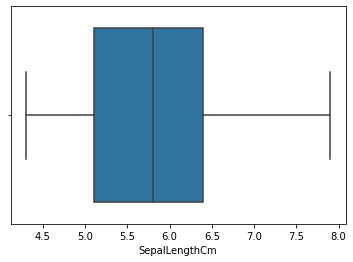

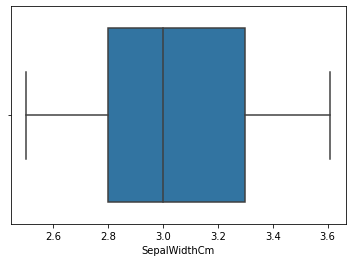

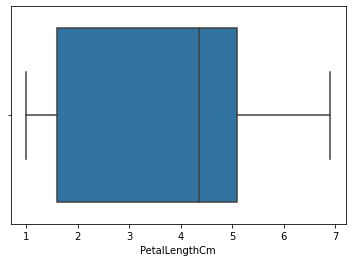

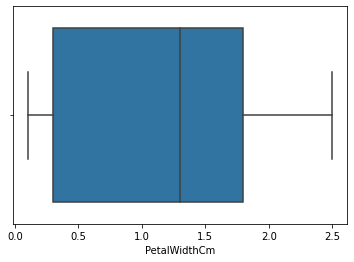

In [31]:
for feature in 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm':
    sns.boxplot(df[feature])
    plt.show()

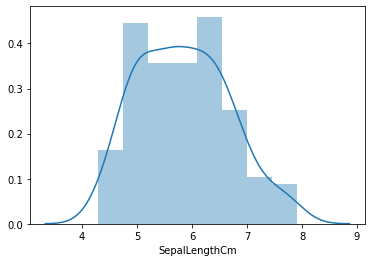

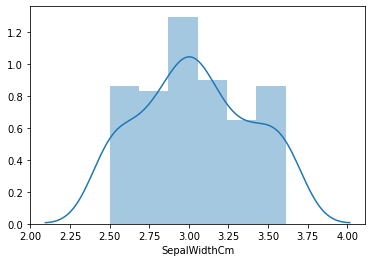

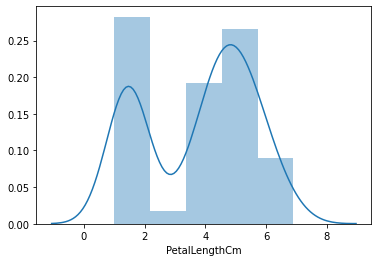

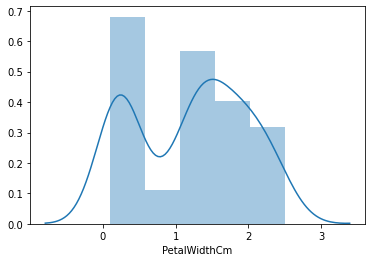

In [32]:
for feature in 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm':
    sns.distplot(df[feature])
    plt.show()

# Remove outliers from 'SepalWidthCm' feature

In [33]:
from sunbird.outliers import flooring_capping
flooring_capping(df,'SepalWidthCm')

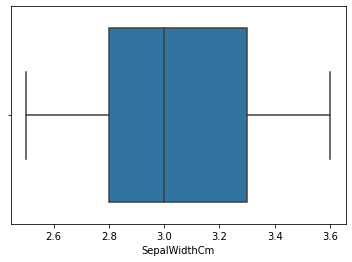

In [34]:
sns.boxplot(df['SepalWidthCm'])

# all outliers from 'SepalWidthCm' are successfully removed 

# Catplot

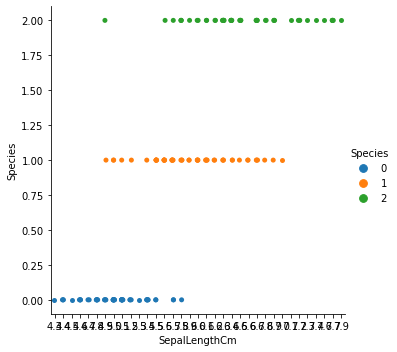

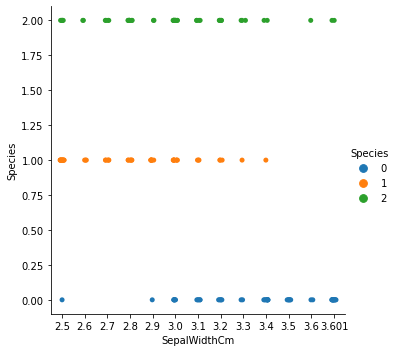

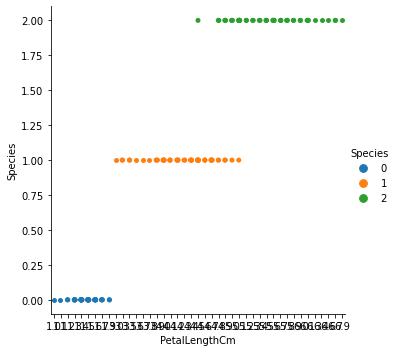

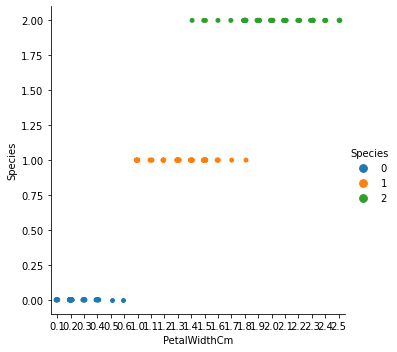

In [35]:
for feature in 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm':
    sns.catplot(x=feature,y='Species',data=df,hue='Species')
    plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [40]:
X=df.drop(['Species'],axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [41]:
y=df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Model Making

In [46]:
model=DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [47]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Predictions

In [48]:
y_pred=model.predict(X_test)

In [49]:
y_pred

array([2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [50]:
model.score(X_test,y_test)

0.9666666666666667

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [52]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


# Visualization of decison tree

In [55]:
from sklearn import tree

[Text(334.79999999999995, 453.0, 'X[0] <= 101.0\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(223.2, 271.8, 'X[4] <= 0.8\ngini = 0.5\nsamples = 76\nvalue = [39, 37, 0]'),
 Text(111.6, 90.59999999999997, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(334.79999999999995, 90.59999999999997, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(446.4, 271.8, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]')]

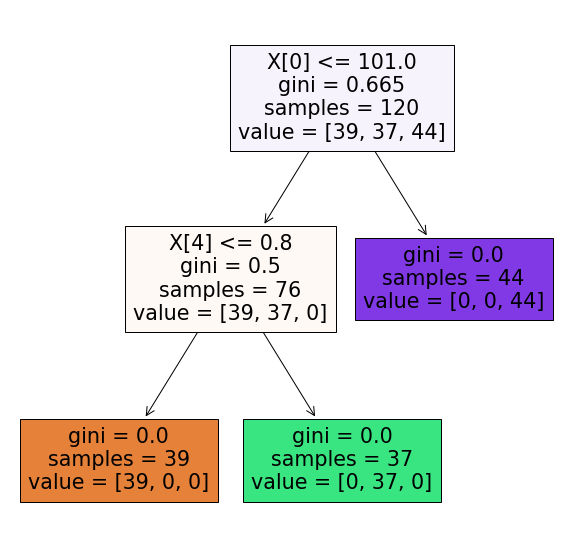

In [58]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)